<a href="https://colab.research.google.com/github/danie-cp/AI/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Water Jug Puzzle**

There are two jugs of water, a five litre jug and a three litre jug. You can fill and empty as much as desired and pour into the jug using the other jug only if it results in at least one of the jugs being emptied out or filled up. Solve a solution to get exactly 4 liters into the 5 litre jug.

## **Start State:**
* Both 5 litre and 3 litre jugs are empty
* [5L:[]             3L:[]]

## **End State:**
* The 5 litre jug contains exactly 4 liters. Note: 3L amount may vary upon solution

* [5L:[1,2,3,4,5]   3L: [1,2,3]]

## **The Solution**

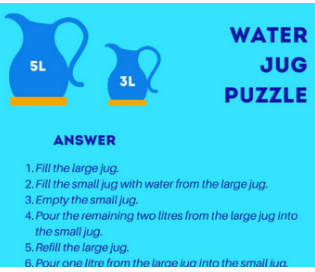

In [1]:
class WaterJugPuzzle():

  def __init__(self):
        self.fiveL  = set([])
        self.threeL = set([])

  def save_state(self):
        self._fiveL  = set(list(self.fiveL))
        self._threeL = set(list(self.threeL))

  def undo_state(self):
        self.fiveL  = set(list(self._fiveL))
        self.threeL = set(list(self._threeL))


####################################################################
# Rule 1: Fill up the 5L Jug
####################################################################
  def Fill_5L(self):
    self.save_state()
    self.fiveL = set([1,2,3,4,5])

####################################################################
# Rule 2: Fill up the 3L Jug
####################################################################

  def Fill_3L(self):
    self.save_state()
    self.threeL = set([1,2,3])

####################################################################
# Rule 3: Empty the 5L Jug
####################################################################

  def Empty_5L(self):
    self.save_state()
    self.fiveL = set([])

####################################################################
# Rule 4: Empty the 3L Jug
####################################################################

  def Empty_3L(self):
    self.save_state()
    self.threeL = set([])

####################################################################
# Rule 5: Transfer 5L into 3L
#The transfer should result in at least one jug being full or empty
#If the 5 litre jug is empty, there is no change in the state
#Once the 3 litre jug reaches its highest capacity or the 5 litre
#jug is empty, the pouring stops

####################################################################

  def Transfer_5Linto_3L(self):
    self.save_state()

    max_amount_to_transfer = len(self.fiveL)

    if len(self.fiveL) ==0:
      return

    for i in range(max_amount_to_transfer):
      if (len(self.threeL) >=3) or (len(self.fiveL) ==0):
            break
      self.threeL.add(len(self.threeL) +1)

      self.fiveL.remove(len(self.fiveL))



####################################################################
# Rule 6: Transfer 3L into 5L
#The transfer should result in at least one jug being full or empty
#If the 3 litre jug is empty, there is no change in the state
#Once the 5 litre jug reaches its highest capacity or the 3 litre jug
#is empty, the pouring stops
####################################################################

  def Transfer_3Linto_5L(self):
    self.save_state()

    max_amount_to_transfer = len(self.threeL)

    if len(self.threeL) ==0:
      return

    for i in range(max_amount_to_transfer):
      if (len(self.threeL) ==0) or (len(self.fiveL) >=5):
        break
      self.fiveL.add(len(self.fiveL)+1)
      self.threeL.remove(len(self.threeL))



####################################################################
# Display who is where
####################################################################
  def print_state(self):
        print("===> 5L: {s}, 3L: {h}".format(s=sorted(self.fiveL), h=sorted(self.threeL)))

In [2]:
#@title Forming the Solution

mcf = WaterJugPuzzle()

# print the initial state
mcf.print_state()

print("-----------------------")
# apply a rule and print the resulting state

Fill_5L = mcf.Fill_5L()
mcf.print_state()

Transfer_5Linto_3L = mcf.Transfer_5Linto_3L()
mcf.print_state()

Empty_3L = mcf.Empty_3L()
mcf.print_state()

Transfer_5Linto_3L = mcf.Transfer_5Linto_3L()
mcf.print_state()

Fill_5L = mcf.Fill_5L()
mcf.print_state()

Transfer_5Linto_3L = mcf.Transfer_5Linto_3L()
mcf.print_state()
























===> 5L: [], 3L: []
===> 5L: [1, 2, 3, 4, 5], 3L: []
===> 5L: [1, 2], 3L: [1, 2, 3]
===> 5L: [1, 2], 3L: []
===> 5L: [], 3L: [1, 2]
===> 5L: [1, 2, 3, 4, 5], 3L: [1, 2]
===> 5L: [1, 2, 3, 4], 3L: [1, 2, 3]
